In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator

from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split

In [3]:
dirTrain = "../../../Documents/ASL_Dataset/Train";
dirTeste = "../../../Documents/ASL_Dataset/Test";


In [4]:
Name=[]
for file in os.listdir(dirTrain):
    Name+=[file]

In [5]:
N=[]
for i in range(len(Name)):
    N+=[i]
    
mapping=dict(zip(Name,N)) 
reverse_mapping=dict(zip(N,Name)) 

def mapper(value):
    return reverse_mapping[value]

In [6]:
dataset=[]
count=0
for file in os.listdir(dirTrain):
    path=os.path.join(dirTrain,file)
    for im in os.listdir(path):
        image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(32,32))
        image=img_to_array(image)
        image=image/255.0
        dataset+=[[image,count]]
    count=count+1


In [ ]:
print(dataset[5996])
    

[array([[[0.64705884, 0.67058825, 0.6627451 ],
        [0.61960787, 0.6784314 , 0.65882355],
        [0.6509804 , 0.6745098 , 0.6666667 ],
        [0.65882355, 0.6666667 , 0.6627451 ],
        [0.654902  , 0.6627451 , 0.6509804 ],
        [0.5568628 , 0.3019608 , 0.2784314 ],
        [0.46666667, 0.3137255 , 0.25490198],
        [0.64705884, 0.64705884, 0.6       ],
        [0.59607846, 0.6313726 , 0.5647059 ],
        [0.60784316, 0.59607846, 0.56078434]],

       [[0.6431373 , 0.67058825, 0.6431373 ],
        [0.6666667 , 0.67058825, 0.6392157 ],
        [0.6784314 , 0.6666667 , 0.6392157 ],
        [0.6666667 , 0.67058825, 0.64705884],
        [0.65882355, 0.6431373 , 0.6392157 ],
        [0.3764706 , 0.19215687, 0.12941177],
        [0.43529412, 0.22352941, 0.18431373],
        [0.6392157 , 0.6039216 , 0.5764706 ],
        [0.6156863 , 0.61960787, 0.5647059 ],
        [0.59607846, 0.59607846, 0.54901963]],

       [[0.654902  , 0.6627451 , 0.6509804 ],
        [0.6627451 , 0.670588

In [ ]:
testeset=[]
count=0
for file in os.listdir(dirTeste):
    path=os.path.join(dirTeste,file)
    for im in os.listdir(path):
        image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(32,32))
        image=img_to_array(image)
        image=image/255.0
        testeset+=[[image,count]]
    count=count+1


In [ ]:
print(testeset[100])

In [ ]:
print(dataset[6000])

In [ ]:
data, labels0 = zip(*dataset)
teste, testlabels0 = zip(*testeset)

In [ ]:
labels1 = to_categorical(labels0)
labels=np.array(labels1)

In [ ]:
print(labels[17996])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [ ]:
data=np.array(data)
test = np.array(teste)

In [ ]:
print(data[17996])

[[[0.6431373  0.6784314  0.6666667 ]
  [0.63529414 0.6784314  0.6627451 ]
  [0.61960787 0.6901961  0.6431373 ]
  ...
  [0.6        0.627451   0.59607846]
  [0.6039216  0.6039216  0.5568628 ]
  [0.5921569  0.6039216  0.5764706 ]]

 [[0.67058825 0.6745098  0.6509804 ]
  [0.654902   0.6509804  0.67058825]
  [0.6313726  0.6666667  0.64705884]
  ...
  [0.6117647  0.61960787 0.5764706 ]
  [0.5686275  0.6117647  0.54509807]
  [0.57254905 0.6117647  0.5764706 ]]

 [[0.6431373  0.67058825 0.6431373 ]
  [0.654902   0.654902   0.654902  ]
  [0.6117647  0.67058825 0.65882355]
  ...
  [0.60784316 0.6156863  0.56078434]
  [0.6039216  0.59607846 0.54901963]
  [0.5882353  0.6156863  0.54509807]]

 ...

 [[0.31764707 0.17254902 0.10980392]
  [0.32156864 0.1882353  0.05098039]
  [0.4        0.13333334 0.05098039]
  ...
  [0.49019608 0.5294118  0.49803922]
  [0.47058824 0.5294118  0.5411765 ]
  [0.47843137 0.5294118  0.5019608 ]]

 [[0.3019608  0.19607843 0.09019608]
  [0.27058825 0.1764706  0.07450981]


In [ ]:
trainx, testx, trainy, testy = train_test_split(data, labels, test_size=0.5, random_state=44)

In [ ]:
print(testy[17996])
# print(testx.shape)
# print(trainy.shape)
# print(testy.shape)
# print(f'First elements of y_train: {trainy[:10].T}\n')

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0.]


In [ ]:
print(trainx[0])

In [ ]:
num_classes = 28
input_shape = (30, 30, 3)

In [ ]:
print(f'Min-max values of X_train: {np.min(trainx),np.max(trainx)}\n')

Min-max values of X_train: (0.0, 1.0)



In [ ]:
model1 = tf.keras.Sequential([
    tf.keras.Input(input_shape),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(5,5), strides=(1,1), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(5,5), strides=(1,1), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(5,5), strides=(1,1), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 128)       6272      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 128)      0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 28800)             0         
                                                                 
 dense (Dense)               (None, 28)                806428    
                                                                 
Total params: 812,700
Trainable params: 812,700
Non-trainable params: 0
_________________________________________________________________


In [ ]:
batch_size = 128
epochs = 30
opt = tf.keras.optimizers.Adam(learning_rate=0.001,
                            beta_1=0.9,
                            beta_2=0.999,
                            epsilon=1e-08,
                            weight_decay=0.0)

# compile model
model1.compile(loss='categorical_crossentropy',
               optimizer=opt,
               metrics = ['accuracy'])



In [ ]:
# training
history = model1.fit(
    trainx,
    trainy,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(testx,testy)
)


Epoch 1/30
648/648 [==============================] - 99s 150ms/step - loss: 0.8607 - accuracy: 0.7712 - val_loss: 0.2361 - val_accuracy: 0.9488
Epoch 2/30
648/648 [==============================] - 107s 166ms/step - loss: 0.1371 - accuracy: 0.9723 - val_loss: 0.0750 - val_accuracy: 0.9873
Epoch 3/30
648/648 [==============================] - 102s 158ms/step - loss: 0.0494 - accuracy: 0.9923 - val_loss: 0.0370 - val_accuracy: 0.9944
Epoch 4/30
648/648 [==============================] - 101s 156ms/step - loss: 0.0238 - accuracy: 0.9970 - val_loss: 0.0169 - val_accuracy: 0.9979
Epoch 5/30
648/648 [==============================] - 104s 161ms/step - loss: 0.0134 - accuracy: 0.9988 - val_loss: 0.0130 - val_accuracy: 0.9989
Epoch 6/30
648/648 [==============================] - 101s 156ms/step - loss: 0.0083 - accuracy: 0.9993 - val_loss: 0.0086 - val_accuracy: 0.9989
Epoch 7/30
648/648 [==============================] - 101s 157ms/step - loss: 0.0248 - accuracy: 0.9943 - val_loss: 0.0119 - 

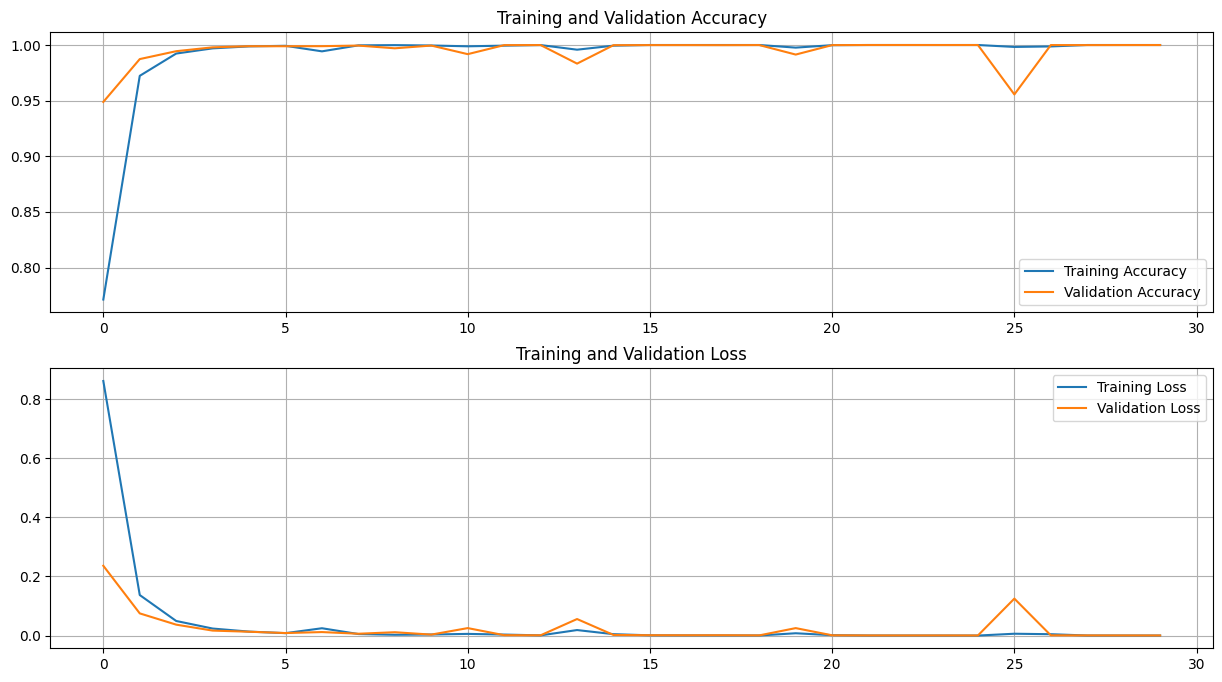

In [ ]:
# verify training performance
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs_range = range(epochs)

plt.figure(figsize=(15, 8))
plt.subplot(2, 1, 1)
plt.grid(True)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.grid(True)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
score = model1.evaluate(testx, testy, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.0003798299585469067
Test accuracy: 0.9999637603759766


In [ ]:
teste = model1.predict()


In [ ]:
print(testx.shape)

(82835, 30, 30, 3)
